In [5]:
cd /Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr 

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr


In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import accesspr as ac
import scipy.interpolate as scint
import prPlottingFunctions as ppf
%matplotlib inline


A lot of nice color sequences.

In [7]:
blueColors=['#f7fcf0',
'#e0f3db',
'#ccebc5',
'#a8ddb5',
'#7bccc4',
'#4eb3d3',
'#2b8cbe',
'#08589e']

magentaColors=['#fff7f3',
'#fde0dd',
'#fcc5c0',
'#fa9fb5',
'#f768a1',
'#dd3497',
'#ae017e',
'#7a0177']

redColors=['#ffffcc',
'#ffeda0',
'#fed976',
'#feb24c',
'#fd8d3c',
'#fc4e2a',
'#e31a1c',
'#b10026'
]
purpleColors=['#fcfbfd',
'#efedf5',
'#dadaeb',
'#bcbddc',
'#9e9ac8',
'#807dba',
'#6a51a3',
'#4a1486']

greyColors=['#ffffff',
'#f0f0f0',
'#d9d9d9',
'#bdbdbd',
'#969696',
'#737373',
'#525252',
'#252525'
]

cyanColors=['#ffffe5',
'#f7fcb9',
'#d9f0a3',
'#addd8e',
'#78c679',
'#41ab5d',
'#238443',
'#005a32']

greenColors=['#ffffe5',
'#f7fcb9',
'#d9f0a3',
'#addd8e',
'#78c679',
'#41ab5d',
'#238443',
'#005a32']

#plt.imshow(array([magentaColors, cyanColors, purpleColors, greyColors,greenColors] ))

In [9]:
pickleFileFolder='/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/allPicklesPromoterProtein'
xpr=ac.accesspr(pickleFileFolder, FL='GFP80', FLperod='c-GFP80perod')
xpr.statContents

trying to open  p201703092.pkl
trying to open  p20170311.pkl

 Adding GFP80 as a consensus. Please correct autofluorescence using this channel.
aligning experiment  p20170311.pkl
aligning experiment  p201703092.pkl
Experiments aligned successfully.


,FLperod,gr,GFP,GFP80,c-GFP80perod
p20170311.pkl,NaN,1,1.0,1.0,1.0
p201703092.pkl,NaN,1,1.0,1.0,1.0


experiment p20170311.pkl media Glu 0.2% strain REF :
experiment p20170311.pkl media Glu 0.2% strain 409.Hxt4 :
experiment p20170311.pkl media Glu 0.2% strain pHXT4 :
experiment p20170311.pkl media Glu 1.5% strain REF :
experiment p20170311.pkl media Glu 1.5% strain 409.Hxt4 :
experiment p20170311.pkl media Glu 1.5% strain pHXT4 :
experiment p20170311.pkl media Glu 2% strain REF :
experiment p20170311.pkl media Glu 2% strain 409.Hxt4 :
experiment p20170311.pkl media Glu 2% strain pHXT4 :
experiment p20170311.pkl media Glu 0.6% strain REF :
experiment p20170311.pkl media Glu 0.6% strain 409.Hxt4 :
experiment p20170311.pkl media Glu 0.6% strain pHXT4 :
experiment p20170311.pkl media Glu 0.4% strain REF :
experiment p20170311.pkl media Glu 0.4% strain 409.Hxt4 :
experiment p20170311.pkl media Glu 0.4% strain pHXT4 :
experiment p20170311.pkl media Glu 1% strain REF :
experiment p20170311.pkl media Glu 1% strain 409.Hxt4 :
experiment p20170311.pkl media Glu 1% strain pHXT4 :
experiment p2017

{'409.Hxt4': '#0d67c9', 'REF': '#47124d', 'pHXT4': '#27442c'}

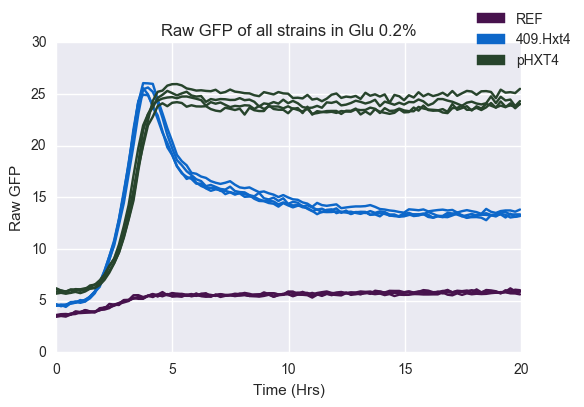

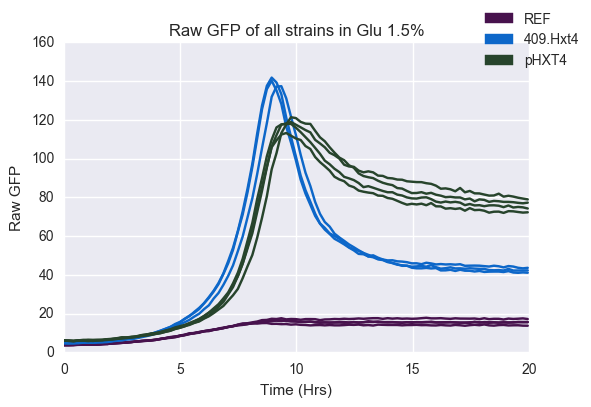

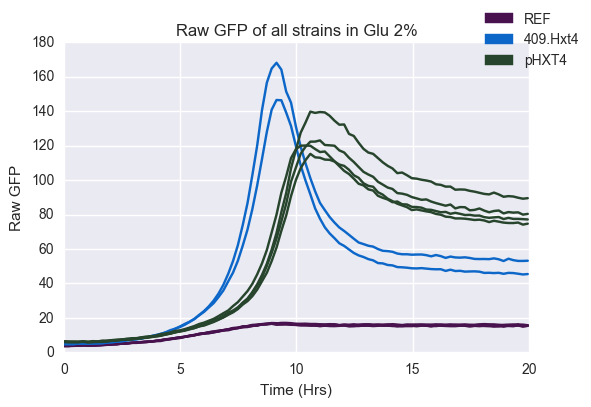

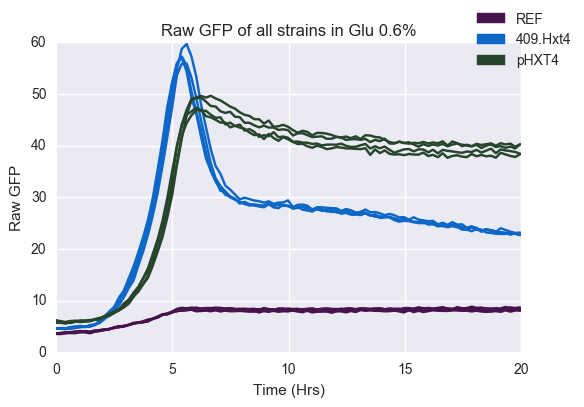

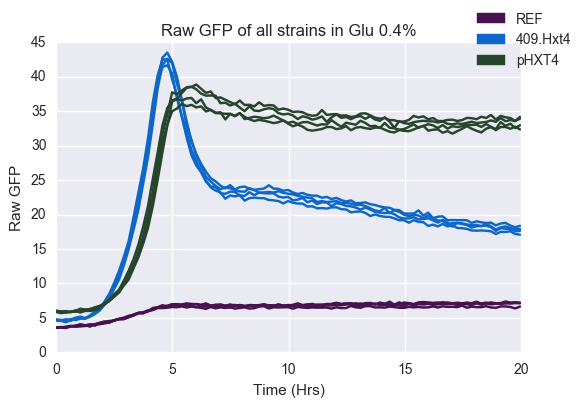

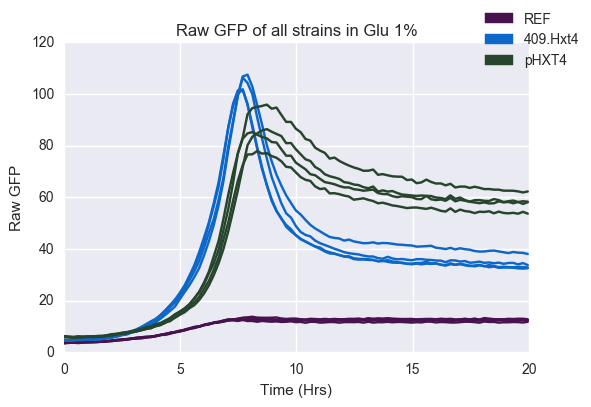

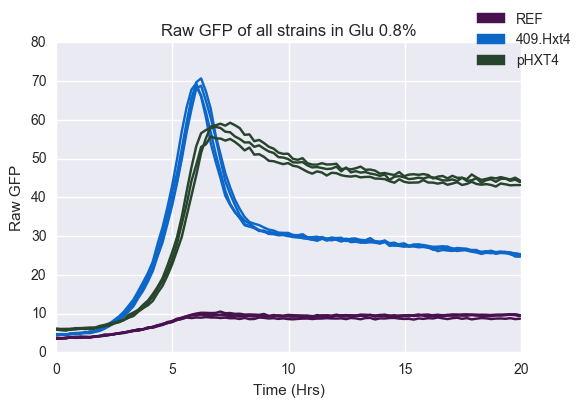

In [10]:
xpr.statDerivative(dtype='c-GFP80perod')
xpr.statDerivative(dtype='gr')
xpr.containsstat('d/dtc-GFP80perod')
xpr.containsstat('d/dtgr')
xpr.statContents
ppf.plotRawStatPerMediaRobust(xpr.data['p201703092.pkl'])
#xpr.plotReplicateMean('Glu 2%', '409.Hxt4')

In [14]:
blueColors=['#f7fcf0',
'#e0f3db',
'#ccebc5',
'#a8ddb5',
'#7bccc4',
'#4eb3d3',
'#2b8cbe',
'#08589e']

meds= ['Glu 0.2%',
 'Glu 0.4%',
 'Glu 0.6%',
 'Glu 0.8%',
 'Glu 1%',
 'Glu 1.5%',
 'Glu 2%']
[xpr.data[expt].machine for expt in xpr.allExperiments]
cols=ppf.colorDict(meds,blueColors)
ppf.plotRawStatPerStrainRobust(xpr.data['p201703092.pkl'], mediaColors=cols, dtype='OD')
ppf.plotRawStatPerStrainRobust(xpr.data['p201703092.pkl'],dtype='c-GFP80perod', mediaColors=cols)
#xpr.plotReplicateMean('Glu 2%', '409.Hxt4')

AttributeError: 'platereader' object has no attribute 'machine'

In [ ]:
ppf.experimentOverview(xpr.data['p20170311.pkl'],  dtype='GFP80', addFL={'GFP80':[0,70]})
ppf.experimentOverview(xpr.data['p201703092.pkl'],  dtype='GFP80', addFL={'GFP80':[0,70]})
#ppf.experimentOverview(xpr.data['p201703092.pkl'])

In [ ]:
for md in xpr.allMedia:
    plt.figure();
    xpr.plotRawReplicates(md, 'pHXT4', dtype='OD', exptColors={'p20170311.pkl': greenColors[-1], 'p201703092.pkl': magentaColors[-1]})
#[xpr.plotReplicateMean(md, '409.Hxt4', dtype='ODmn') for md in xpr.allMedia]

In [ ]:
df=xpr.extractAllInfo()
#sns.lmplot('FinalOD', 'FLperodAUC', data=df,hue='strain')